##### This analysis is done in python primarily using the pandas library, and jupyter notebook as an interactive interpreter.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
pd.options.display.max_rows = 30

df = pd.read_csv("/Users/Hegstrom/Desktop/HCT390_assignment_ACO_data_file.csv", thousands=',')
# Getting everything loaded up, and setting up the dataframe.

# Question #1

#### Are physician-led or hospital-managed ACOs more likely to perform better with respect to their overall savings rate? Do you think the difference is meaningful? Hint: One way to do this is to calculate the average savings rate and standard deviation between the two types of ACOs. Then use the means, standard deviation, and a chart to answer this question.

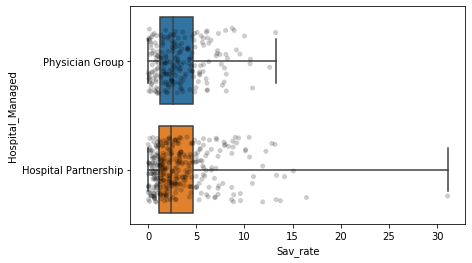

In [4]:
# Here, I'm making the savings rate into a percentage. This isn't necessary, I just like the formatting.
df['Sav_rate'] = df['Sav_rate']*100 

# This maps the underlying binary varaible into a human readable format.
hospital_physician_binary = {
    0: 'Physician Group',
    1: 'Hospital Partnership'
}
# Applying the data transformation to the hospital managed column.
df['Hospital_Managed'] = df['Hospital_Managed'].map(hospital_physician_binary)

# Alright, let's create a plot.
ax = sns.boxplot(x=df['Sav_rate'], y=df['Hospital_Managed'], whis=np.inf)
ax = sns.stripplot(x=df['Sav_rate'], y=df['Hospital_Managed'], color="0", jitter=.3, alpha=0.2)

The chart above is a combination boxplot and strip plot. The boxplot makes it easy to see the average, and interquartile ranges are basically the same. The mostly transparent dots are the individual data points (strip plot). I like this because it shows there is a single hospital partnership group that has a VERY high savings rate. Almost twice any other. They're an outlier. Let's remove them for now.

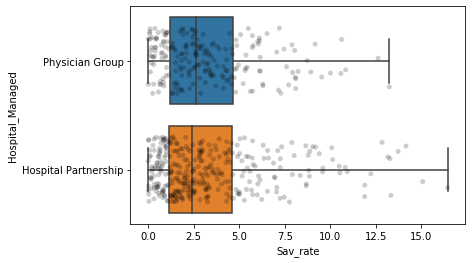

In [5]:
# Keep all of the data with a savings rate less than 30:
outlier_removed_df = df[df['Sav_rate'] < 30]

#Plot, again.
ax = sns.boxplot(x=outlier_removed_df['Sav_rate'], y=outlier_removed_df['Hospital_Managed'], whis=np.inf)
ax = sns.stripplot(x=outlier_removed_df['Sav_rate'], y=outlier_removed_df['Hospital_Managed'], color="0", jitter=.3, alpha=0.2)

In [6]:
#In order to do a T-Test, we need to split the groups into two seperate arrays, and pass it to another function.
phys_group = df[df['Hospital_Managed'] == "Physician Group"]['Sav_rate'].values
hosp_group = df[df['Hospital_Managed'] == "Hospital Partnership"]['Sav_rate'].values
t, p = stats.ttest_ind(phys_group, hosp_group)
print('T-Score: {}'.format(t))
print('p-value: {}'.format(p))

T-Score: -0.579904503622566
p-value: 0.5622182327297058


This shows there is a non-significant p-value for the observed groups, meaning that the difference between the two is likely due to chance, and chance alone.
#### So, there is likely no difference in the savings rate between physician lead groups, or hospital partnerships.